In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("gene_data.csv")
labels = pd.read_csv('gene_labels.csv')
df = df.drop(columns='Unnamed: 0')

In [3]:
df = df.dropna(axis=1)
low_var = VarianceThreshold(threshold=0.001)
low_var = low_var.fit(df)
concol = [column for column in df.columns 
          if column not in df.columns[low_var.get_support()]]
df = df.drop(concol, axis = 1) 

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

df['Class'] = labels['Class']
df['Class'] = df['Class'].astype('category')
df

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,-0.194799,-0.828030,0.159800,-1.948277,1.221575,-0.207968,0.180910,-0.125376,-0.065633,-0.082114,...,-0.921755,-0.877838,0.996247,-1.166072,0.389441,-0.869566,-1.187938,-0.116483,-0.261901,PRAD
1,-0.194799,-2.015017,-1.415042,1.353109,-0.376518,-0.532222,-0.983088,-0.125376,-0.065633,-0.586764,...,-2.392213,-0.831893,0.591649,-2.549598,1.391628,0.623551,-0.342277,-1.656889,-0.261901,LUAD
2,-0.194799,0.417348,1.156735,0.249807,0.112832,-0.391297,-0.092995,-0.125376,-0.065633,-0.586764,...,-1.059669,2.248803,0.232601,0.317880,-4.025621,-0.632381,0.886860,-1.855264,-0.261901,PRAD
3,-0.194799,0.543888,1.326182,-0.099053,0.755741,0.395348,-0.127831,-0.125376,-0.065633,-0.586764,...,0.044905,0.224956,1.719725,-0.263847,-0.521747,-0.793609,0.166174,-1.078941,-0.261901,PRAD
4,-0.194799,-0.295955,-0.257107,-0.286413,-0.148843,-0.757118,-0.273165,-0.125376,-0.065633,-0.586764,...,0.208252,0.837739,0.979924,0.196645,0.268992,-1.615841,-0.229878,-0.201588,-0.261901,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-0.194799,-0.954328,-0.354155,0.983356,0.380054,-0.578502,-0.005819,-0.125376,-0.065633,-0.586764,...,0.584642,-0.135605,-0.152573,-0.238559,0.431432,-0.589804,0.890943,1.587933,-0.261901,BRCA
797,-0.194799,0.776655,1.275624,-0.588497,0.480533,-0.076907,-0.983088,-0.125376,-0.065633,-0.586764,...,1.422436,-0.612944,0.717105,-1.270672,-0.162408,0.279202,-1.499107,1.993137,-0.261901,LUAD
798,-0.194799,0.198881,0.574816,2.292529,-0.611452,0.118352,2.578699,-0.125376,-0.065633,5.763787,...,-0.257444,1.132504,-0.528281,-0.733465,0.654847,0.906442,-0.220082,-0.410467,1.348558,COAD
799,-0.194799,-0.350453,-0.288632,0.934054,0.342783,1.632398,-0.983088,-0.125376,-0.065633,0.759330,...,-0.266264,2.502171,-0.042767,-0.216665,-0.811922,0.310652,1.437193,0.091951,-0.261901,PRAD


In [14]:
X, y = df.drop(columns='Class'), df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25)

0.1


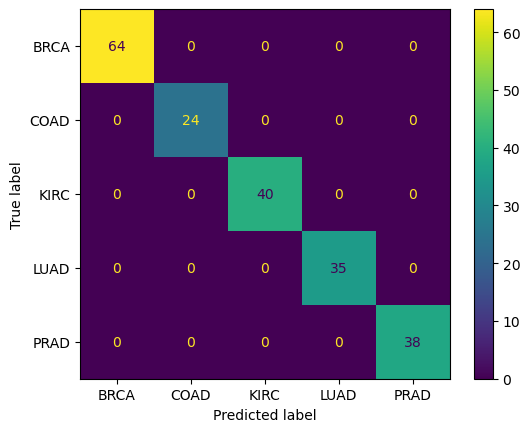

In [5]:
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ridgecv = RidgeClassifierCV(cv=10).fit(X_train, y_train)
print(ridgecv.alpha_)

rigde = RidgeClassifier(alpha=ridgecv.alpha_).fit(X_train, y_train)
cm = confusion_matrix(y_test, rigde.predict(X_test), labels=rigde.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rigde.classes_)
display.plot()

0.1716020795538617


/Users/giu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/giu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


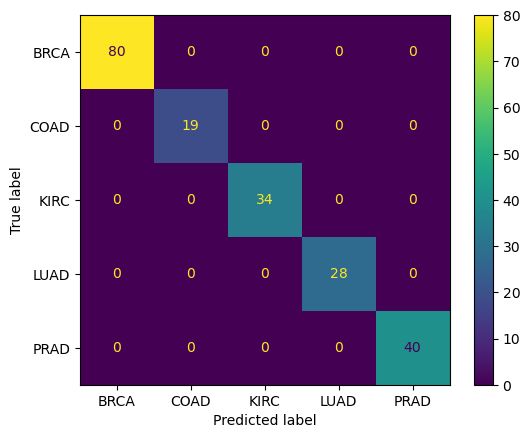

In [15]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
lassocv = LogisticRegressionCV( penalty='l1', cv=5, solver='liblinear').fit(X_train, y_train)
print(np.mean(lassocv.C_))

lasso = LogisticRegression(C=np.mean(lassocv.C_), l1_ratio=1, solver = "saga").fit(X_train, y_train)
cm = confusion_matrix(y_test, lasso.predict(X_test), labels=lasso.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lasso.classes_)
display.plot()

<Axes: ylabel='Feature'>

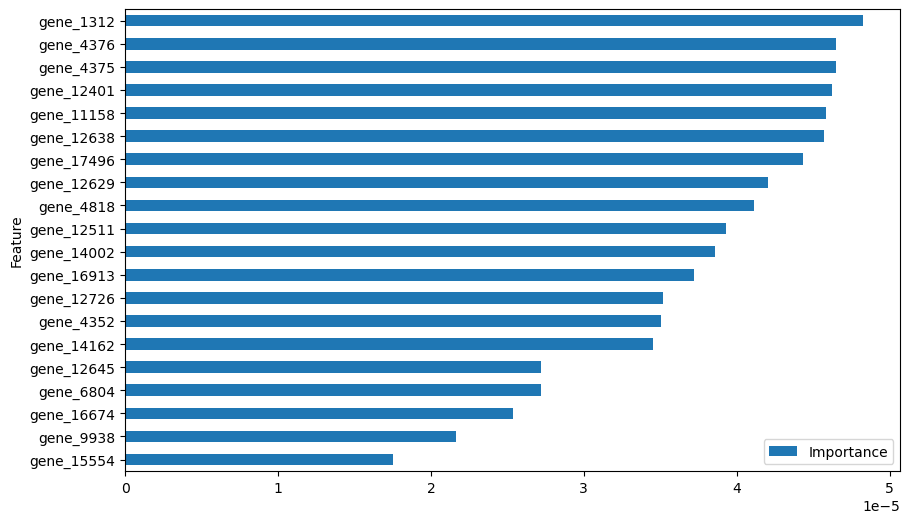

In [12]:
coefficients = lasso.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)[:20]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [13]:
print("The alpha for Ridge Regression is: ", ridgecv.alpha_)
print("The alpha for Lasso Regression is: ", lassocv.C_)

The alpha for Ridge Regression is:  0.1
The alpha for Lasso Regression is:  [2.78255940e+00 4.64158883e-02 4.64158883e-02 1.66810054e+02
 4.64158883e-02]
